In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
df = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [3]:
df = df.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4": "seen_2",
    "Unnamed: 5": "seen_3",
    "Unnamed: 6": "seen_4",
    "Unnamed: 7": "seen_5",
    "Unnamed: 8": "seen_6",
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "favorite_1",
    "Unnamed: 10": "favorite_2",
    "Unnamed: 11": "favorite_3",
    "Unnamed: 12": "favorite_4",
    "Unnamed: 13": "favorite_5",
    "Unnamed: 14": "favorite_6",
    "Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.": "Han Solo",
    "Unnamed: 16": "Luke Skywalker",
    "Unnamed: 17": "Princess Leia Organa",
    "Unnamed: 18": "Anakin Skywalker",
    "Unnamed: 19": "Obi Wan Kenobi",
    "Unnamed: 20": "Emperor Palpatine",
    "Unnamed: 21": "Darth Vader",
    "Unnamed: 22": "Lando Calrissian",
    "Unnamed: 23": "Boba Fett",
    "Unnamed: 24": "C-3PO",
    "Unnamed: 25": "R2-D2",
    "Unnamed: 26": "Jar Jar Binks",
    "Unnamed: 27": "Padme Amidala",
    "Unnamed: 28": "Yoda"
})

df.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6',
       'favorite_1', 'favorite_2', 'favorite_3', 'favorite_4', 'favorite_5',
       'favorite_6', 'Han Solo', 'Luke Skywalker', 'Princess Leia Organa',
       'Anakin Skywalker', 'Obi Wan Kenobi', 'Emperor Palpatine',
       'Darth Vader', 'Lando Calrissian', 'Boba Fett', 'C-3PO', 'R2-D2',
       'Jar Jar Binks', 'Padme Amidala', 'Yoda', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],
      dtype='object')

In [4]:
# Clean yes-no questions response data
yes_no = {"Yes": True, "No": False, True: True, False: False}

for column in [
    "Have you seen any of the 6 films in the Star Wars franchise?",
    "Do you consider yourself to be a fan of the Star Wars film franchise?",
    "Are you familiar with the Expanded Universe?",
    "Do you consider yourself to be a fan of the Expanded Universe?",
    "Do you consider yourself to be a fan of the Star Trek franchise?"
]:
    df[column] = df[column].map(yes_no, na_action="ignore")

df["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna=False)

Have you seen any of the 6 films in the Star Wars franchise?
True     936
False    250
NaN        1
Name: count, dtype: int64

In [5]:
# Clean the 'movies seen' columns
movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    True: True,
    False: False,
    np.nan: False
}

for column in df.columns[3:9]:
    df[column] = df[column].map(movie_mapping)


In [6]:
# Clean the character liking data
liking_mapping = {
    "Very favorably": 2,
    "Somewhat favorably": 1,
    "Neither favorably nor unfavorably (neutral)": 0,
    "Somewhat unfavorably": -1,
    "Very unfavorably": -2
}

for column in df.columns[15:29]:
    df[column] = df[column].map(liking_mapping)

In [7]:
# Clean the data from non-numeric items
for column in df.columns[9:15]:
    df[column] = pd.to_numeric(df[column], errors="coerce")

## Analysis

### Average Ranking by Gender and Amount of Respondents by Gender

In [8]:
males = df[df["Gender"] == "Male"]
females = df[df["Gender"] == "Female"]

mean_males = males[males.columns[9:15]].mean()
mean_females = females[females.columns[9:15]].mean()

males_tot_seen = males[males.columns[3:9]].sum()
females_tot_seen = females[females.columns[3:9]].sum()

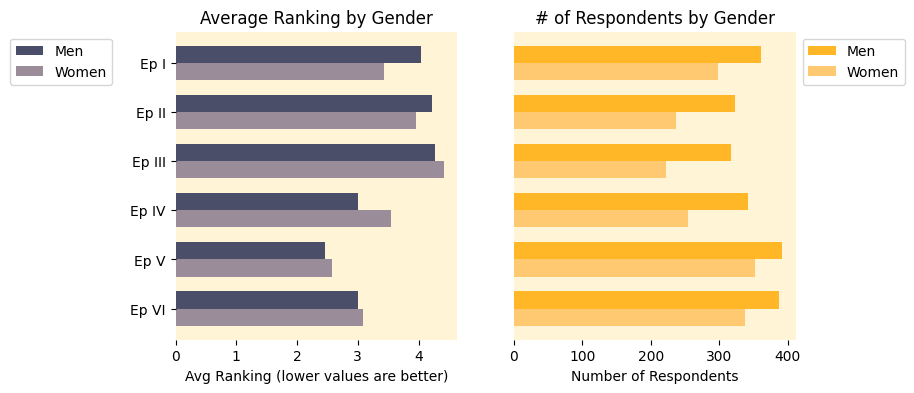

In [9]:
ind = np.arange(6)
height = 0.35
offset = ind + height

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

malebar = ax[0].barh(ind, mean_males, color="#4a4e69", height=height)
femalebar = ax[0].barh(offset, mean_females, color="#9a8c98", height=height)
ax[0].set_title("Average Ranking by Gender")
ax[0].set_yticks(ind + height / 2)
ax[0].set_yticklabels((
    "Ep I",
    "Ep II",
    "Ep III",
    "Ep IV",
    "Ep V",
    "Ep VI"
))
ax[0].set_facecolor("#fff4d6")
ax[0].set_xlabel("Avg Ranking (lower values are better)")

ax[0].legend((malebar[0], femalebar[0]), ("Men", "Women"), bbox_to_anchor=[-0.2, 1])
ax[0].invert_yaxis()

maleseenbar = ax[1].barh(ind, males_tot_seen, color="#ffb627", height=height)
femaleseenbar = ax[1].barh(offset, females_tot_seen, color="#ffc971", height=height)
ax[1].set_title("# of Respondents by Gender")
ax[1].set_yticks([])
ax[1].set_facecolor("#fff4d6")
ax[1].set_xlabel("Number of Respondents")

ax[1].legend((maleseenbar[0], femaleseenbar[0]), ("Men", "Women"), bbox_to_anchor=[1, 1])
ax[1].invert_yaxis()


for a in ax:
    for spine in ["top", "right", "bottom", "left"]:
        a.spines[spine].set_visible(False)

plt.show()

### Character Popularity

In [10]:
popularity = df[df.columns[15:29]].mean()

min_value = popularity.min()
if min_value < 0:
    popularity += abs(min_value) + 0.02  # Add a negligigble value to show a very short line at the least liked character

popularity = popularity.sort_values(ascending=False)

popularity

Han Solo                1.911091
Obi Wan Kenobi          1.871527
Yoda                    1.869003
Luke Skywalker          1.819707
R2-D2                   1.808613
Princess Leia Organa    1.794387
C-3PO                   1.643042
Anakin Skywalker        1.014717
Lando Calrissian        0.876006
Padme Amidala           0.843717
Darth Vader             0.718268
Boba Fett               0.596454
Emperor Palpatine       0.310530
Jar Jar Binks           0.020000
dtype: float64

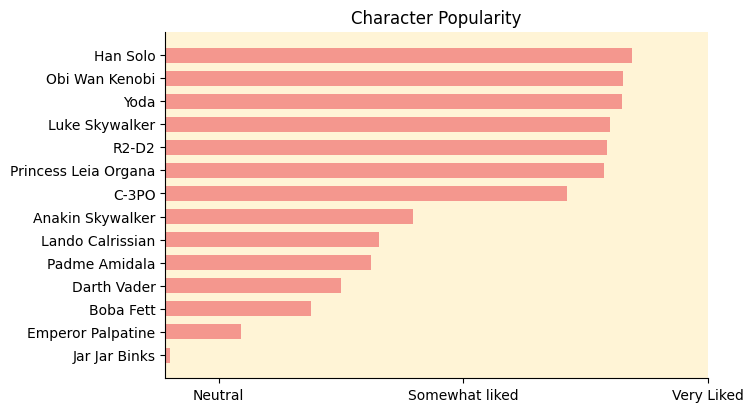

In [11]:
ind = np.arange(14)
height = 0.65

fig, ax = plt.subplots(figsize=(7, 4.5))

ax.barh(ind, popularity.values, color="#f4978e", height=height)
ax.set_title("Character Popularity")
ax.set_xticks([abs(min_value), abs(min_value) + 1, abs(min_value) + 2])
ax.set_xticklabels(("Neutral", "Somewhat liked", "Very Liked"))
ax.set_yticks(ind)
ax.set_yticklabels(popularity.index)
ax.set_facecolor("#fff4d6")

for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
ax.invert_yaxis()

### Percentage of Star Wars and Star Trek Fans by Age

In [12]:
def is_star_wars_fan(age_range):
    return df[df["Age"] == age_range]["Have you seen any of the 6 films in the Star Wars franchise?"]

def is_star_trek_fan(age_range):
    return df[df["Age"] == age_range]["Do you consider yourself to be a fan of the Star Trek franchise?"]

def is_common_fan(age_range):
    d = df[df["Age"] == age_range]
    return ((d["Have you seen any of the 6 films in the Star Wars franchise?"]) &
            (d["Do you consider yourself to be a fan of the Star Trek franchise?"])
            ).sum()

star_wars_fans = pd.Series(dtype=np.float64)
star_trek_fans = pd.Series(dtype=np.float64)
common_fans = pd.Series(dtype=np.float64)

for age_range in ["18-29", "30-44", "45-60", "> 60"]:
    sw_fans = is_star_wars_fan(age_range)
    st_fans = is_star_trek_fan(age_range)
    com_fans = is_common_fan(age_range)

    star_wars_fans.loc[age_range] = sw_fans.value_counts()[True] / len(sw_fans) * 100
    star_trek_fans.loc[age_range] = st_fans.value_counts()[True] / len(st_fans) * 100
    common_fans.loc[age_range] = com_fans / len(sw_fans) * 100

star_wars_fans, star_trek_fans, common_fans

(18-29    82.568807
 30-44    77.238806
 45-60    82.474227
 > 60     71.747212
 dtype: float64,
 18-29    31.651376
 30-44    38.805970
 45-60    49.484536
 > 60     39.405204
 dtype: float64,
 18-29    30.275229
 30-44    37.686567
 45-60    48.453608
 > 60     38.289963
 dtype: float64)

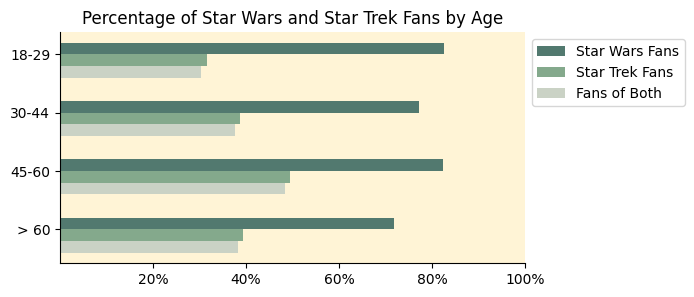

In [13]:
ind = np.arange(4)
height = 0.2
offset = ind + height

fig, ax = plt.subplots(figsize=(6, 3))

sw_fans_bar = ax.barh(ind, star_wars_fans.values, height=height, color="#52796f")
st_fans_bar = ax.barh(offset, star_trek_fans, height=height, color="#84a98c")
common_fans_bar = ax.barh(offset + height, common_fans, height=height, color="#cad2c5")
ax.set_title("Percentage of Star Wars and Star Trek Fans by Age")
ax.set_xticks([20, 40, 60, 80, 100])
ax.set_xticklabels(["20%", "40%", "60%", "80%", "100%"])
ax.set_yticks(ind + height / 2)
ax.set_yticklabels(star_wars_fans.index)
ax.set_facecolor("#fff4d6")

ax.legend(
    (sw_fans_bar, st_fans_bar, common_fans_bar),
    ("Star Wars Fans", "Star Trek Fans", "Fans of Both"),
    bbox_to_anchor=(1, 1)
    )

for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
ax.invert_yaxis()

### Correlation of Character Popularity

In [14]:
correlation = df[df.columns[15:29]].corr()
display(correlation)


,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3PO,R2-D2,Jar Jar Binks,Padme Amidala,Yoda
Han Solo,1.000000,0.581526,0.555026,0.185245,0.520271,0.103019,0.155105,0.320727,0.168446,0.422290,0.437019,-0.056159,0.122930,0.409875
Luke Skywalker,0.581526,1.000000,0.681335,0.289257,0.535990,0.083588,0.064021,0.213994,0.060932,0.502545,0.481351,0.111027,0.211472,0.445264
Princess Leia Organa,0.555026,0.681335,1.000000,0.279740,0.517070,0.098075,0.107646,0.263754,0.107915,0.500904,0.480876,0.075760,0.239514,0.440291
Anakin Skywalker,0.185245,0.289257,0.279740,1.000000,0.297632,0.243135,0.116431,0.160517,0.090612,0.259436,0.276716,0.326406,0.388061,0.264661
Obi Wan Kenobi,0.520271,0.535990,0.517070,0.297632,1.000000,0.112986,0.126814,0.230471,0.124150,0.446799,0.523652,0.021297,0.230191,0.496592
Emperor Palpatine,0.103019,0.083588,0.098075,0.243135,0.112986,1.000000,0.532067,0.321193,0.482278,0.098893,0.049465,0.131706,0.084110,0.003027
Darth Vader,0.155105,0.064021,0.107646,0.116431,0.126814,0.532067,1.000000,0.298870,0.508279,0.017044,0.050280,-0.061729,-0.039753,0.051238
Lando Calrissian,0.320727,0.213994,0.263754,0.160517,0.230471,0.321193,0.298870,1.000000,0.408803,0.216793,0.222578,0.074436,0.147587,0.230751
Boba Fett,0.168446,0.060932,0.107915,0.090612,0.124150,0.482278,0.508279,0.408803,1.000000,0.054757,0.091815,0.029949,0.046071,0.048180
C-3PO,0.422290,0.502545,0.500904,0.259436,0.446799,0.098893,0.017044,0.216793,0.054757,1.000000,0.711940,0.231752,0.248499,0.440321


In [15]:
pairs = correlation.unstack()

# Drop self-correlations
pairs = pairs[pairs.index.get_level_values(0) != pairs.index.get_level_values(1)]

# Remove duplicates
pairs.index = pairs.index.map(lambda x: tuple(sorted(x)))
pairs = pairs[~pairs.index.duplicated()]

# Sort by Correlation
pairs = pairs.abs().sort_values(ascending=False)

pairs.head(5)

C-3PO           R2-D2                   0.711940
Luke Skywalker  Princess Leia Organa    0.681335
Han Solo        Luke Skywalker          0.581526
                Princess Leia Organa    0.555026
Luke Skywalker  Obi Wan Kenobi          0.535990
dtype: float64

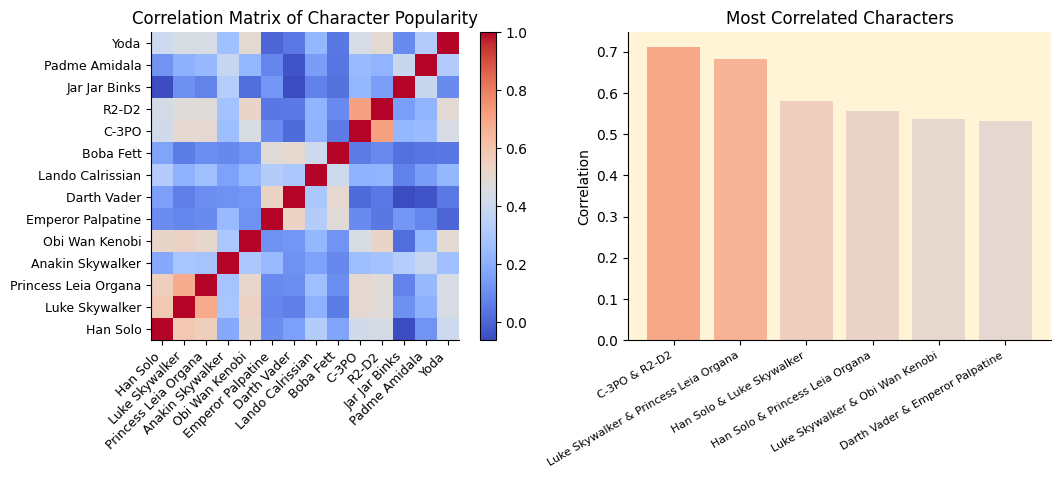

In [42]:
ind = np.arange(len(correlation.columns))

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

cax = ax[0].matshow(correlation, cmap="coolwarm")
plt.colorbar(cax)

ax[0].set_title("Correlation Matrix of Character Popularity")
ax[0].set_xticks(ind)
ax[0].set_yticks(ind)

ax[0].set_xticklabels(correlation.columns, rotation=45, ha="right", fontsize=9)
ax[0].set_yticklabels(correlation.columns, fontsize=9)

ax[0].tick_params(top=False, labeltop=False, bottom=True, labelbottom=True)
ax[0].invert_yaxis()


n = 6  # Amount of correlation pairs shown on the graph

ax[1].bar(np.arange(n), pairs[:n], width=0.8, color=plt.cm.coolwarm(pairs[:n]))
ax[1].set_title("Most Correlated Characters")

ax[1].set_ylabel("Correlation")
ax[1].set_xticks(np.arange(n))
ax[1].set_xticklabels(pairs.index[:n].map(lambda x: " & ".join(x)), rotation=30, ha="right", fontsize=8)

ax[1].set_facecolor("#fff4d6")

for a in ax:
    for spine in ("top", "right"):
        a.spines[spine].set_visible(False)

plt.show()